**Data Analysis, EDA, Feature Engineering Module**

In [ ]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Kaggle/Github
# Dataset owner - Ani Kannal
# Date created - 2020-08-18

#Link for reference: https://www.kaggle.com/anikannal/solar-power-generation-data

In [91]:
# Import required libraries for EDA and Data Preparation

# Plotting libraries
import plotly.express as px

#math libraries
import numpy as np
import pandas as pd
import numpy.random as nr
import time
import datetime
import seaborn as sns
import plotly.graph_objects as go
"""
#Scaling Features
#sklearn
from sklearn.preprocessing import MinMaxScaler
"""

'''
# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')
'''

'''
#Import multi-line printing (for Jupyter Labs)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
'''

'\n#Import multi-line printing (for Jupyter Labs)\nfrom IPython.core.interactiveshell import InteractiveShell\nInteractiveShell.ast_node_interactivity = "all"\n'

**Data Inspection**

In [92]:
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
url = 'https://github.com/phestvik/Amii_SolarPowerGenerationData/blob/main/'
raw_flag = '?raw=true'

file1 = url + 'Plant_1_Generation_Data.csv' + raw_flag
file2 = url + 'Plant_1_Weather_Sensor_Data.csv' + raw_flag
file3 = url + 'Plant_2_Generation_Data.csv' + raw_flag
file4 = url + 'Plant_2_Weather_Sensor_Data.csv' + raw_flag

df_plant1_gen = pd.read_csv(file1)
df_plant1_sensor = pd.read_csv(file2)
df_plant2_gen = pd.read_csv(file3)
df_plant2_sensor = pd.read_csv(file4)

In [93]:
#@title
#Renaming Source Key Column into its true descriptor for generation data
df_plant1_gen.rename(columns={'SOURCE_KEY':'INVERTER_ID'}, inplace=True)
df_plant2_gen.rename(columns={'SOURCE_KEY':'INVERTER_ID'}, inplace=True)
#Dropping Source Key Column from sensor data because it is the same for the entire file
df_plant2_sensor.drop('SOURCE_KEY', axis=1, inplace=True)
df_plant1_sensor.drop('SOURCE_KEY', axis=1, inplace=True)

#### Date Transformation

From the Plotly https://plotly.com/chart-studio-help/date-format-and-time-series/, it accepts datetime.data and datetime.datetime formats. In the df, the data is stored as a str. We need to convert it.

In [94]:
#Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT.
df_plant1_gen["DATE_TIME"] = pd.to_datetime(df_plant1_gen["DATE_TIME"], errors='coerce', format='%d-%m-%Y %H:%M')
df_plant1_sensor["DATE_TIME"] = pd.to_datetime(df_plant1_sensor["DATE_TIME"], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_plant2_gen["DATE_TIME"] = pd.to_datetime(df_plant2_gen["DATE_TIME"], errors='coerce', format='%Y-%m-%d %H:%M:%S')
df_plant2_sensor["DATE_TIME"] = pd.to_datetime(df_plant2_sensor["DATE_TIME"], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [95]:
display(df_plant1_gen['DATE_TIME'].isnull().sum())
display(df_plant1_sensor['DATE_TIME'].isnull().sum())
display(df_plant2_gen['DATE_TIME'].isnull().sum())
display(df_plant2_sensor['DATE_TIME'].isnull().sum())

0

0

0

0

# EDA

## EDA - Individual CSV

### Tables

#### Plant 1

In [96]:
print("Plant 1")
display(df_plant1_gen)

Plant 1


,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [97]:
print(f'Plant1 Generation Dataset shape is: {df_plant1_gen.shape}')

Plant1 Generation Dataset shape is: (68778, 7)


In [98]:
# Look at the Generator Data
label_plant = 'DC_POWER'
type(df_plant1_gen.describe().columns)
df_plant1_gen.describe().columns.tolist()
#numerical_features_plant1_generator = np.array(df_plant1_gen.describe().columns.tolist())
numerical_features_plant1_generator = np.array(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'])


categorical_features_plant1_generator = np.array([column for column in df_plant1_gen.columns \
                                   if column not in numerical_features_plant1_generator and \
                                      column != label_plant])

print("Plant 1 - Generator Data")
print("Numerical Features ({}): {}".format(len(numerical_features_plant1_generator.tolist()), numerical_features_plant1_generator.tolist()))
print("Categorical Features ({}): {}".format(len(categorical_features_plant1_generator.tolist()), categorical_features_plant1_generator.tolist()))
print("Check that there are {} + {} = {} total features".format(len(numerical_features_plant1_generator.tolist()), len(categorical_features_plant1_generator.tolist()), len(df_plant1_gen.columns)))

Plant 1 - Generator Data
Numerical Features (4): ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
Categorical Features (3): ['DATE_TIME', 'PLANT_ID', 'INVERTER_ID']
Check that there are 4 + 3 = 7 total features


In [99]:
df_plant1_gen[numerical_features_plant1_generator].describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,3147.426211,307.802752,3295.968737,6.978712e+06
std,4036.457169,394.396439,3145.178309,4.162720e+05
min,0.000000,0.000000,0.000000,6.183645e+06
25%,0.000000,0.000000,0.000000,6.512003e+06
50%,429.000000,41.493750,2658.714286,7.146685e+06
75%,6366.964286,623.618750,6274.000000,7.268706e+06
max,14471.125000,1410.950000,9163.000000,7.846821e+06


In [100]:
df_plant1_gen[numerical_features_plant1_generator].nunique()

DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64

In [101]:
df_plant1_gen[categorical_features_plant1_generator].describe()

,PLANT_ID
count,68778.0
mean,4135001.0
std,0.0
min,4135001.0
25%,4135001.0
50%,4135001.0
75%,4135001.0
max,4135001.0


**For Plant 1**, we see there are 22 inverters.

In [102]:
#To see the unique values of total yield
df_plant1_gen.TOTAL_YIELD.value_counts()

6555136.000    49
6340538.000    48
7071198.000    48
7239542.000    48
7201349.000    48
               ..
6542371.571     1
6499226.429     1
7356891.250     1
7233209.286     1
6291471.000     1
Name: TOTAL_YIELD, Length: 37267, dtype: int64

In [103]:
(df_plant1_gen == "?").any() 

DATE_TIME      False
PLANT_ID       False
INVERTER_ID    False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

In [104]:
df_plant1_gen.isna().any()

DATE_TIME      False
PLANT_ID       False
INVERTER_ID    False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
dtype: bool

#### Sensor 1

In [105]:
print("Sensor 1")
display(df_plant1_sensor)

Sensor 1


,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,24.621525,22.165423,0.0
...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,21.969495,20.734963,0.0


In [106]:
print(f'Plant1 Sensor Dataset Shape is: {df_plant1_sensor.shape}')

Plant1 Sensor Dataset Shape is: (3182, 5)


In [107]:
# Look at the Sensor Data
label_sensor = 'IRRADIATION' #AA - commenting out this code because I don't think we need a label for the sensor data | PH I had to uncomment as the scatter plots in Plotting require it.
type(df_plant1_sensor.describe().columns)
df_plant1_sensor.describe().columns.tolist()
#numerical_features_plant1_sensor = np.array(df_plant1_sensor.describe().columns.tolist())
numerical_features_plant1_sensor = np.array(['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION'])

categorical_features_plant1_sensor = np.array([column for column in df_plant1_sensor.columns \
                                   if column not in numerical_features_plant1_sensor])

print("Plant 1 - Sensor Data")
print("Numerical Features ({}): {}".format(len(numerical_features_plant1_sensor.tolist()), numerical_features_plant1_sensor.tolist()))
print("Categorical Features ({}): {}".format(len(categorical_features_plant1_sensor.tolist()), categorical_features_plant1_sensor.tolist()))
print("Check that there are {} + {} = {} total features".format(len(numerical_features_plant1_sensor.tolist()), len(categorical_features_plant1_sensor.tolist()), len(df_plant1_sensor.columns)))

Plant 1 - Sensor Data
Numerical Features (3): ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
Categorical Features (2): ['DATE_TIME', 'PLANT_ID']
Check that there are 3 + 2 = 5 total features


In [108]:
df_plant1_sensor[numerical_features_plant1_sensor].describe()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.000000,3182.000000,3182.000000
mean,25.531606,31.091015,0.228313
std,3.354856,12.261222,0.300836
min,20.398505,18.140415,0.000000
25%,22.705182,21.090553,0.000000
50%,24.613814,24.618060,0.024653
75%,27.920532,41.307840,0.449588
max,35.252486,65.545714,1.221652


In [109]:
df_plant1_sensor[numerical_features_plant1_sensor].nunique()

AMBIENT_TEMPERATURE    3182
MODULE_TEMPERATURE     3182
IRRADIATION            1758
dtype: int64

In [110]:
df_plant1_sensor[categorical_features_plant1_sensor].describe()

,PLANT_ID
count,3182.0
mean,4135001.0
std,0.0
min,4135001.0
25%,4135001.0
50%,4135001.0
75%,4135001.0
max,4135001.0


#### Plant 2

In [111]:
print("Plant 2")
display(df_plant2_gen)

Plant 2


,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [112]:
#Looking at the shape of our files after cleaning out unnecessary columns
print(f'Plant2 Generation Dataset shape is: {df_plant2_gen.shape}')

Plant2 Generation Dataset shape is: (67698, 7)


In [113]:
# Look at the Generator Data
# label_plant = 'DC_POWER' #label_plant was created about in Plant1 EDA
type(df_plant2_gen.describe().columns)
df_plant2_gen.describe().columns.tolist()
#numerical_features_plant2_generator = np.array(df_plant2_gen.describe().columns.tolist())
numerical_features_plant2_generator = np.array(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'])


categorical_features_plant2_generator = np.array([column for column in df_plant2_gen.columns \
                                   if column not in numerical_features_plant2_generator])

print("Plant 2 - Generator Data")
print("Numerical Features ({}): {}".format(len(numerical_features_plant2_generator.tolist()), numerical_features_plant2_generator.tolist()))
print("Categorical Features ({}): {}".format(len(categorical_features_plant2_generator.tolist()), categorical_features_plant2_generator.tolist()))
print("Check that there are {} + {} = {} total features".format(len(numerical_features_plant2_generator.tolist()), len(categorical_features_plant2_generator.tolist()), len(df_plant2_gen.columns)))

Plant 2 - Generator Data
Numerical Features (4): ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
Categorical Features (3): ['DATE_TIME', 'PLANT_ID', 'INVERTER_ID']
Check that there are 4 + 3 = 7 total features


In [114]:
df_plant2_gen[numerical_features_plant2_generator].describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,246.701961,241.277825,3294.890295,6.589448e+08
std,370.569597,362.112118,2919.448386,7.296678e+08
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,272.750000,1.996494e+07
50%,0.000000,0.000000,2911.000000,2.826276e+08
75%,446.591667,438.215000,5534.000000,1.348495e+09
max,1420.933333,1385.420000,9873.000000,2.247916e+09


In [115]:
df_plant2_gen[numerical_features_plant2_generator].nunique()

DC_POWER       30743
AC_POWER       30721
DAILY_YIELD    30345
TOTAL_YIELD    33114
dtype: int64

In [116]:
df_plant2_gen[categorical_features_plant2_generator].describe()

,PLANT_ID
count,67698.0
mean,4136001.0
std,0.0
min,4136001.0
25%,4136001.0
50%,4136001.0
75%,4136001.0
max,4136001.0


**For Plant 2**, we see there are 22 inverters also!

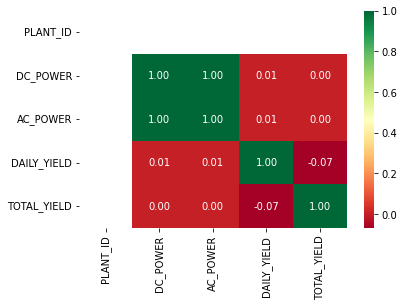

In [117]:
sns.heatmap(df_plant2_gen.corr(), annot=True, cmap="RdYlGn", fmt="0.2f")

#### Sensor 2

In [118]:
print("Sensor 2")
display(df_plant2_sensor)

Sensor 2


,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,26.596148,25.088210,0.0
...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,23.291048,22.373909,0.0


In [119]:
print(f'Plant2 Sensor Dataset Shape is: {df_plant2_sensor.shape}')

Plant2 Sensor Dataset Shape is: (3259, 5)


In [120]:
# Look at the Sensor Data
#label_sensor = 'IRRADIATION' #AA - commenting out this code because I don't think we need a label for the sensor data | PH I had to uncomment as the scatter plots in Plotting require it.
type(df_plant2_sensor.describe().columns)
df_plant2_sensor.describe().columns.tolist()
#numerical_features_plant2_sensor = np.array(df_plant2_sensor.describe().columns.tolist())
numerical_features_plant2_sensor = np.array(['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION'])

categorical_features_plant2_sensor = np.array([column for column in df_plant2_sensor.columns \
                                   if column not in numerical_features_plant2_sensor])

print("Plant 1 - Sensor Data")
print("Numerical Features ({}): {}".format(len(numerical_features_plant2_sensor.tolist()), numerical_features_plant2_sensor.tolist()))
print("Categorical Features ({}): {}".format(len(categorical_features_plant2_sensor.tolist()), categorical_features_plant2_sensor.tolist()))
print("Check that there are {} + {} = {} total features".format(len(numerical_features_plant2_sensor.tolist()), len(categorical_features_plant2_sensor.tolist()), len(df_plant2_sensor.columns)))

Plant 1 - Sensor Data
Numerical Features (3): ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
Categorical Features (2): ['DATE_TIME', 'PLANT_ID']
Check that there are 3 + 2 = 5 total features


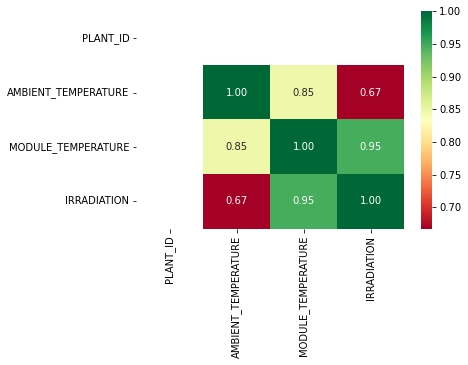

In [121]:
sns.heatmap(df_plant2_sensor.corr(), annot=True, cmap="RdYlGn", fmt="0.2f")

In [122]:
df_plant2_sensor.corr()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,NaN,1.000000,0.847273,0.667639
MODULE_TEMPERATURE,NaN,0.847273,1.000000,0.946886
IRRADIATION,NaN,0.667639,0.946886,1.000000


### Plotting

#### Plant 1 / Sensor 1

In [123]:
label = label_plant
px.scatter_matrix(df_plant1_gen, numerical_features_plant1_generator, color=label, \
                  width=len(numerical_features_plant1_generator) * 200, 
                  height=len(numerical_features_plant1_generator) * 200)

Output hidden; open in https://colab.research.google.com to view.

In [124]:
label = label_sensor
px.scatter_matrix(df_plant1_sensor, numerical_features_plant1_sensor, color=label, \
                  width=len(numerical_features_plant1_sensor) * 200, 
                  height=len(numerical_features_plant1_sensor) * 200)

In [125]:
features = df_plant1_gen.describe().columns.tolist()

for feature in features:
  fig = px.histogram(df_plant1_gen, x=feature, marginal="box", height=300)#color=label_name,
  #fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [126]:
df1genbox = df_plant1_gen.drop(["PLANT_ID", "INVERTER_ID", "TOTAL_YIELD"], axis = 1)
fig = px.box(pd.melt(df1genbox), x = "variable", y = "value", points = "outliers")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [127]:
df1sensor = df_plant1_sensor.drop(["PLANT_ID"], axis = 1)
fig = px.box(pd.melt(df1sensor), x = "variable", y ="value", points = "outliers")
fig.show()

In [128]:
features = df_plant1_sensor.describe().columns.tolist()

for feature in features:
  fig = px.histogram(df_plant1_sensor, x=feature, marginal="box", height=300)#color=label_name,
  #fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
  fig.show()

In [129]:
fig = px.line(df_plant1_gen, x="DATE_TIME", y="DAILY_YIELD", color='INVERTER_ID')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [130]:
fig = px.line(df_plant1_gen, x="DATE_TIME", y="TOTAL_YIELD", color='INVERTER_ID')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [131]:
fig = px.line(df_plant1_sensor, x="DATE_TIME", y="IRRADIATION", title='Time Series Irradtion')
fig.show()

In [132]:
fig = px.scatter(df_plant1_gen, x="DATE_TIME", y="DC_POWER", color='INVERTER_ID')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#### Plant 2 / Sensor 2

In [133]:
label = label_plant
px.scatter_matrix(df_plant2_gen, numerical_features_plant2_generator, color=label, \
                  width=len(numerical_features_plant1_generator) * 200, 
                  height=len(numerical_features_plant1_generator) * 200)

Output hidden; open in https://colab.research.google.com to view.

In [134]:
label = label_sensor
px.scatter_matrix(df_plant2_sensor, numerical_features_plant2_sensor, color=label, \
                  width=len(numerical_features_plant1_sensor) * 200, 
                  height=len(numerical_features_plant1_sensor) * 200)

In [135]:
features = df_plant2_gen.describe().columns.tolist()

for feature in features:
  fig = px.histogram(df_plant2_gen, x=feature, marginal="box", height=300)#color=label_name,
  #fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [136]:
features = df_plant2_sensor.describe().columns.tolist()

for feature in features:
  fig = px.histogram(df_plant2_sensor, x=feature, marginal="box", height=300)#color=label_name,
  #fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
  fig.show()

In [137]:

df2genbox = df_plant2_gen.drop(["PLANT_ID","INVERTER_ID", "TOTAL_YIELD"], axis = 1)
fig = px.box(pd.melt(df2genbox), x = "variable", y = "value", points = "outliers")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [138]:
df2sensor = df_plant2_sensor.drop(["PLANT_ID"], axis = 1)
fig = px.box(pd.melt(df2sensor), x = "variable", y = "value", points = "outliers")
fig.show()

In [174]:
fig = px.line(df_plant2_gen, x="DATE_TIME", y="DC_POWER", color='INVERTER_ID')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [140]:
pd.set_option('display.max_rows', 100)
#display(datetime.date(2020,5,17))
df_plant2_gen.query(f'(INVERTER_ID == "4UPUqMRk7TRMgml") and (DATE_TIME > "{datetime.date(2020,5,17)}") and (DATE_TIME < "{datetime.date(2020,5,18)}")')
#print(f'Plant1 Generation Dataset shape is: {df_plant1_gen.shape}')
#pd.reset_option("display.max_rows")

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
4224,2020-05-17 00:15:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,5677.000000,2.438889e+06
4246,2020-05-17 00:30:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,5677.000000,2.438889e+06
4268,2020-05-17 00:45:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,5677.000000,2.438889e+06
4290,2020-05-17 01:00:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,4541.600000,2.438889e+06
4312,2020-05-17 01:15:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.438889e+06
4334,2020-05-17 01:30:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.438889e+06
4356,2020-05-17 01:45:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.438889e+06
4378,2020-05-17 02:00:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.438889e+06
4400,2020-05-17 02:15:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.438889e+06
4422,2020-05-17 02:30:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.438889e+06


PH - Plant2 generation data looks noisy and the scale is quite different than Plant1. The shape of the data looks similar so likely a scaling function will be required here.

## EDA - Combined Data

In [141]:
df_list = [df_plant1_gen, df_plant1_sensor, df_plant2_gen, df_plant2_sensor]

In [142]:
for i , j in enumerate(df_list):

  j['DATE_TIME'] = pd.to_datetime(j['DATE_TIME'])

In [143]:
dfplant1 = df_plant1_gen.merge(df_plant1_sensor, right_on= 'DATE_TIME', left_on= 'DATE_TIME')
dfplant2 = df_plant2_gen.merge(df_plant2_sensor, right_on= 'DATE_TIME', left_on= 'DATE_TIME')
dfplant1 = dfplant1.drop(['PLANT_ID_y'], axis = 1)
dfplant2 = dfplant2.drop(['PLANT_ID_y'], axis = 1)
dfplant1 = dfplant1.rename(columns={"PLANT_ID_x" : "PLANT_ID"})
dfplant2 = dfplant2.rename(columns={"PLANT_ID_x" : "PLANT_ID"})


In [144]:
print('Plant 1')
display(dfplant1)
print('Plant 2')
display(dfplant2)

Plant 1


,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


Plant 2


,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [145]:
dfplant1.head(22)

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0
5,2020-05-15 00:00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0,25.184316,22.857507,0.0
6,2020-05-15 00:00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0,25.184316,22.857507,0.0
7,2020-05-15 00:00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0,25.184316,22.857507,0.0
8,2020-05-15 00:00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,25.184316,22.857507,0.0
9,2020-05-15 00:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0,25.184316,22.857507,0.0


In [146]:
(dfplant1 == "NaN").any()

DATE_TIME              False
PLANT_ID               False
INVERTER_ID            False
DC_POWER               False
AC_POWER               False
DAILY_YIELD            False
TOTAL_YIELD            False
AMBIENT_TEMPERATURE    False
MODULE_TEMPERATURE     False
IRRADIATION            False
dtype: bool

In [147]:
df1inverter1 = dfplant1.loc[dfplant1['INVERTER_ID'] == '1BY6WEcLGh8j5v7']

In [148]:
df1inverter1.loc[df1inverter1['DC_POWER'] != 0.0000]

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
510,2020-05-15 06:00:00,4135001,1BY6WEcLGh8j5v7,37.142857,3.585714,0.000000,6259559.000,24.088446,22.206757,0.005887
531,2020-05-15 06:15:00,4135001,1BY6WEcLGh8j5v7,278.000000,26.862500,2.625000,6259561.625,24.011635,22.353459,0.022282
552,2020-05-15 06:30:00,4135001,1BY6WEcLGh8j5v7,626.571429,60.685714,13.285714,6259572.286,23.976731,22.893282,0.049410
574,2020-05-15 06:45:00,4135001,1BY6WEcLGh8j5v7,1224.750000,119.275000,34.875000,6259593.875,24.218990,24.442444,0.095394
596,2020-05-15 07:00:00,4135001,1BY6WEcLGh8j5v7,1734.571429,170.014286,72.714286,6259631.714,24.537398,27.185653,0.141940
...,...,...,...,...,...,...,...,...,...,...
68202,2020-06-17 17:30:00,4135001,1BY6WEcLGh8j5v7,1260.600000,122.620000,5456.000000,6485254.000,24.278404,26.862443,0.090132
68224,2020-06-17 17:45:00,4135001,1BY6WEcLGh8j5v7,878.142857,85.271429,5488.714286,6485286.714,24.174170,25.950272,0.065259
68246,2020-06-17 18:00:00,4135001,1BY6WEcLGh8j5v7,564.285714,54.614286,5504.857143,6485302.857,24.130349,25.080925,0.041940
68268,2020-06-17 18:15:00,4135001,1BY6WEcLGh8j5v7,314.750000,30.412500,5515.625000,6485313.625,24.038157,24.068250,0.023446


In [149]:
dfplant1['INVERTER_ID'].value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
VHMLBKoKgIrUVDU    3133
7JYdWkrLSPkdwr4    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
wCURE6d3bPkepu2    3125
z9Y9gH1T5YWrNuG    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
uHbuxQJl8lW7ozc    3125
sjndEbLyjtCKgGv    3124
rGa61gmuvPhdLxV    3124
zVJPv84UY57bAof    3124
McdE0feGgRqW7Ca    3124
ZoEaEvLYb1n2sOq    3123
zBIq5rxdHJRwDNY    3119
1IF53ai7Xc0U56Y    3118
adLQvlD726eNBSB    3118
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: INVERTER_ID, dtype: int64

# Feature Engineering

## Creating Time of Day

### Plant 1

In [150]:
# Create time from date time
dfplant1['HOUR'] = dfplant1['DATE_TIME'].dt.hour
dfplant1['HOUR'] = dfplant1['HOUR'].astype('int')
dfplant1['DATE'] = dfplant1['DATE_TIME'].dt.date

In [151]:
dfplant1.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
INVERTER_ID                    object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
HOUR                            int64
DATE                           object
dtype: object

In [152]:
display(dfplant1)

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,0,2020-05-15
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,2020-05-15
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,2020-05-15
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,2020-05-15
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,23,2020-06-17
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,23,2020-06-17
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,23,2020-06-17
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,23,2020-06-17


In [153]:
# Define function for grouping hours
def time_hour(time):
    if time >= 6 and time < 12:
        return "Morning"
    elif time >= 12 and time < 17:
        return "Afternoon"
    elif time >= 17 and time < 21:
        return "Evening"
    else:
        return "Night"

  #Is there any risk by not having the bins have the same number of hours?

In [154]:
dfplant1['TIME_OF_DAY'] = dfplant1['HOUR'].apply(time_hour).astype('category')

In [155]:
display(dfplant1)

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,0,2020-05-15,Night
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,2020-05-15,Night
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,2020-05-15,Night
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,2020-05-15,Night
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,2020-05-15,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,23,2020-06-17,Night
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,23,2020-06-17,Night
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,23,2020-06-17,Night
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,23,2020-06-17,Night


In [156]:
fig = px.bar(dfplant1, x="TIME_OF_DAY", y="TOTAL_YIELD",color='TOTAL_YIELD', title='TOTAL YIELD BY TIME OF DAY')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Plant 2

In [157]:
# Create time from date time
dfplant2['HOUR'] = dfplant2['DATE_TIME'].dt.hour
dfplant2['HOUR'] = dfplant2['HOUR'].astype('int')
dfplant2['DATE'] = dfplant2['DATE_TIME'].dt.date

In [158]:
dfplant2.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
INVERTER_ID                    object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
HOUR                            int64
DATE                           object
dtype: object

In [159]:
display(dfplant2)

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0,2020-05-15
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,0,2020-05-15
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,0,2020-05-15
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,0,2020-05-15
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,0,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0,23,2020-06-17
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0,23,2020-06-17
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0,23,2020-06-17
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0,23,2020-06-17


In [160]:
dfplant2['TIME_OF_DAY'] = dfplant2['HOUR'].apply(time_hour).astype('category')

In [161]:
display(dfplant2)

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0,2020-05-15,Night
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,0,2020-05-15,Night
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,0,2020-05-15,Night
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,0,2020-05-15,Night
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,0,2020-05-15,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0,23,2020-06-17,Night
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0,23,2020-06-17,Night
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0,23,2020-06-17,Night
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0,23,2020-06-17,Night


In [162]:
fig = px.bar(dfplant2, x="TIME_OF_DAY", y="TOTAL_YIELD",color='TOTAL_YIELD', title='TOTAL YIELD BY TIME OF DAY')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Creating Yield

### Plant 1

In [163]:
display(dfplant1)

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,0,2020-05-15,Night
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0,2020-05-15,Night
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0,2020-05-15,Night
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0,2020-05-15,Night
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0,2020-05-15,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,23,2020-06-17,Night
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,23,2020-06-17,Night
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,23,2020-06-17,Night
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,23,2020-06-17,Night


In [164]:
#dfplant1['YIELD_CHANGE'] = dfplant1['DAILY_YIELD'] - dfplant1['DAILY_YIELD'].shift(1)

In [165]:
res = []

grp = dfplant1.groupby(["INVERTER_ID",'DATE'])
for name, group in grp:
  group['YIELD_CHANGE'] = group['DAILY_YIELD'] - group['DAILY_YIELD'].shift(1) #PH - I think we can delete this line
  group['YIELD_CHANGE2'] = group['TOTAL_YIELD'] - group['TOTAL_YIELD'].shift(1) #PH - I think we should rename the feature to YIELD_CHANGE
  res.append(group)

#res is a list of dataframe
#df = pd.concat(list_of_dataframes)
dfplant1 = pd.concat(res)
dfplant1.sort_values(by=['DATE_TIME','INVERTER_ID'], ascending=[True, True])
dfplant1.reset_index(drop=True, inplace=True)
dfplant1

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY,YIELD_CHANGE,YIELD_CHANGE2
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,0,2020-05-15,Night,NaN,NaN
1,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.084589,22.761668,0.0,0,2020-05-15,Night,0.0,0.0
2,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.935753,22.592306,0.0,0,2020-05-15,Night,0.0,0.0
3,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.846130,22.360852,0.0,0,2020-05-15,Night,0.0,0.0
4,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,24.621525,22.165423,0.0,1,2020-05-15,Night,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 22:45:00,4135001,zVJPv84UY57bAof,0.0,0.0,5910.0,7363272.0,22.150570,21.480377,0.0,22,2020-06-17,Night,0.0,0.0
68770,2020-06-17 23:00:00,4135001,zVJPv84UY57bAof,0.0,0.0,5910.0,7363272.0,22.129816,21.389024,0.0,23,2020-06-17,Night,0.0,0.0
68771,2020-06-17 23:15:00,4135001,zVJPv84UY57bAof,0.0,0.0,5910.0,7363272.0,22.008275,20.709211,0.0,23,2020-06-17,Night,0.0,0.0
68772,2020-06-17 23:30:00,4135001,zVJPv84UY57bAof,0.0,0.0,5910.0,7363272.0,21.969495,20.734963,0.0,23,2020-06-17,Night,0.0,0.0


In [166]:
dfplant1
#dfplant1.drop('level_0',1)
#display(type(dfplant1.index))
#display(dfplant1.index)
dfplant1[dfplant1['YIELD_CHANGE']<0]
#dfplant1[dfplant1['YIELD_CHANGE2']<0] # note there are no instances (confirmed by the top plot)
#temp.iloc[67510:67520]
#temp.iloc[371:380] #PH - Saving this example for AA

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY,YIELD_CHANGE,YIELD_CHANGE2
374,2020-05-19 00:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6283648.000,22.548998,20.529877,0.000000,0,2020-05-19,Night,-624.750000,0.000
467,2020-05-20 00:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6290097.000,22.255206,20.110174,0.000000,0,2020-05-20,Night,-806.125000,0.000
543,2020-05-21 08:00:00,4135001,1BY6WEcLGh8j5v7,3089.833333,303.116667,241.333333,6298697.000,23.968256,33.119169,0.364678,8,2020-05-21,Morning,-54.916667,54.750
551,2020-05-21 10:00:00,4135001,1BY6WEcLGh8j5v7,6160.571429,602.600000,1257.857143,6300099.571,28.207800,53.517202,0.700566,10,2020-05-21,Morning,-311.000000,184.714
608,2020-05-22 00:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6305589.000,23.675199,21.192954,0.000000,0,2020-05-22,Night,-905.375000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67443,2020-06-04 00:15:00,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7263053.000,23.230530,22.087488,0.000000,0,2020-06-04,Night,-979.500000,0.000
67517,2020-06-04 20:00:00,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7271273.000,24.203576,21.570215,0.000000,20,2020-06-04,Evening,-8219.875000,0.125
67702,2020-06-06 19:30:00,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7285530.000,23.032048,21.725838,0.000000,19,2020-06-06,Evening,-6440.000000,0.000
68199,2020-06-11 23:45:00,4135001,zVJPv84UY57bAof,0.000000,0.000000,4962.125000,7322687.000,22.883351,20.635208,0.000000,23,2020-06-11,Night,-708.875000,0.000


In [167]:
fig = px.bar(dfplant1.groupby(['TIME_OF_DAY'],as_index=False)['YIELD_CHANGE'].agg('sum'), x="TIME_OF_DAY", y="YIELD_CHANGE",color='YIELD_CHANGE', title='YIELD_CHANGE BY TIME OF DAY')
fig.show()

fig = px.bar(dfplant1.groupby(['TIME_OF_DAY'],as_index=False)['YIELD_CHANGE2'].agg('sum'), x="TIME_OF_DAY", y="YIELD_CHANGE2",color='YIELD_CHANGE2', title='YIELD_CHANGE2 BY TIME OF DAY')
fig.show()


### Plant 2

In [168]:
res = []

grp = dfplant2.groupby(["INVERTER_ID",'DATE'])
for name, group in grp:
  group['YIELD_CHANGE'] = group['DAILY_YIELD'] - group['DAILY_YIELD'].shift(1)
  group['YIELD_CHANGE2'] = group['TOTAL_YIELD'] - group['TOTAL_YIELD'].shift(1)
  res.append(group)

#res is a list of dataframe
#df = pd.concat(list_of_dataframes)
dfplant2 = pd.concat(res)
dfplant2.sort_values(by=['DATE_TIME','INVERTER_ID'], ascending=[True, True])
dfplant2.reset_index(drop=True, inplace=True)
dfplant2

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY,YIELD_CHANGE,YIELD_CHANGE2
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,27.004764,25.060789,0.0,0,2020-05-15,Night,NaN,NaN
1,2020-05-15 00:15:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.880811,24.421869,0.0,0,2020-05-15,Night,0.0,0.0
2,2020-05-15 00:30:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.682055,24.427290,0.0,0,2020-05-15,Night,0.0,0.0
3,2020-05-15 00:45:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.500589,24.420678,0.0,0,2020-05-15,Night,0.0,0.0
4,2020-05-15 01:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,7540.0,2429011.0,26.596148,25.088210,0.0,1,2020-05-15,Night,-1885.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 22:45:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0,23.511703,22.856201,0.0,22,2020-06-17,Night,0.0,0.0
67694,2020-06-17 23:00:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0,23.482282,22.744190,0.0,23,2020-06-17,Night,0.0,0.0
67695,2020-06-17 23:15:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0,23.354743,22.492245,0.0,23,2020-06-17,Night,0.0,0.0
67696,2020-06-17 23:30:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0,23.291048,22.373909,0.0,23,2020-06-17,Night,0.0,0.0


In [169]:
dfplant2
dfplant2[dfplant2['YIELD_CHANGE']<0]

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY,YIELD_CHANGE,YIELD_CHANGE2
4,2020-05-15 01:00:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,7540.000000,2.429011e+06,26.596148,25.088210,0.000000,1,2020-05-15,Night,-1885.000000,0.000000e+00
5,2020-05-15 01:15:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.429011e+06,26.512740,25.317970,0.000000,1,2020-05-15,Night,-7540.000000,0.000000e+00
99,2020-05-16 01:00:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,3360.800000,2.433212e+06,26.440456,24.553809,0.000000,1,2020-05-16,Night,-840.200000,0.000000e+00
100,2020-05-16 01:15:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2.433212e+06,26.193042,24.117222,0.000000,1,2020-05-16,Night,-3360.800000,0.000000e+00
195,2020-05-17 01:00:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,4541.600000,2.438889e+06,25.762797,24.348200,0.000000,1,2020-05-17,Night,-1135.400000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67563,2020-06-16 14:15:00,4136001,xoJJ8DcxJEcupym,222.413333,217.853333,1993.000000,9.768751e+07,30.429874,40.680056,0.492803,14,2020-06-16,Afternoon,-2157.133333,-1.116427e+08
67564,2020-06-16 14:30:00,4136001,xoJJ8DcxJEcupym,0.000000,0.000000,0.000000,1.395536e+07,30.833513,44.376507,0.562944,14,2020-06-16,Afternoon,-1993.000000,-8.373215e+07
67603,2020-06-17 00:15:00,4136001,xoJJ8DcxJEcupym,0.000000,0.000000,2841.066667,2.093314e+08,24.140737,23.967333,0.000000,0,2020-06-17,Night,-2485.933333,0.000000e+00
67604,2020-06-17 00:30:00,4136001,xoJJ8DcxJEcupym,0.000000,0.000000,0.000000,2.093314e+08,24.054857,23.861644,0.000000,0,2020-06-17,Night,-2841.066667,0.000000e+00


In [170]:
fig = px.bar(dfplant2.groupby(['TIME_OF_DAY'],as_index=False)['YIELD_CHANGE'].agg('sum'), x="TIME_OF_DAY", y="YIELD_CHANGE",color='YIELD_CHANGE', title='PLANT 2 - YIELD_CHANGE BY TIME OF DAY')
fig.show()

fig = px.bar(dfplant2.groupby(['TIME_OF_DAY'],as_index=False)['YIELD_CHANGE2'].agg('sum'), x="TIME_OF_DAY", y="YIELD_CHANGE2",color='YIELD_CHANGE2', title='PLANT 2 - YIELD_CHANGE2 BY TIME OF DAY')
fig.show()


## IRL

In [171]:
dfplant1['IRL'] = dfplant1['DC_POWER'] / dfplant1['AC_POWER']
dfplant2['IRL'] = dfplant2['DC_POWER'] / dfplant2['AC_POWER']

In [172]:
dfplant1[dfplant1['IRL']>0]

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY,YIELD_CHANGE,YIELD_CHANGE2,IRL
24,2020-05-15 06:00:00,4135001,1BY6WEcLGh8j5v7,37.142857,3.585714,0.000000,6259559.000,24.088446,22.206757,0.005887,6,2020-05-15,Morning,0.000000,0.000,10.358566
25,2020-05-15 06:15:00,4135001,1BY6WEcLGh8j5v7,278.000000,26.862500,2.625000,6259561.625,24.011635,22.353459,0.022282,6,2020-05-15,Morning,2.625000,2.625,10.349000
26,2020-05-15 06:30:00,4135001,1BY6WEcLGh8j5v7,626.571429,60.685714,13.285714,6259572.286,23.976731,22.893282,0.049410,6,2020-05-15,Morning,10.660714,10.661,10.324859
27,2020-05-15 06:45:00,4135001,1BY6WEcLGh8j5v7,1224.750000,119.275000,34.875000,6259593.875,24.218990,24.442444,0.095394,6,2020-05-15,Morning,21.589286,21.589,10.268288
28,2020-05-15 07:00:00,4135001,1BY6WEcLGh8j5v7,1734.571429,170.014286,72.714286,6259631.714,24.537398,27.185653,0.141940,7,2020-05-15,Morning,37.839286,37.839,10.202504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68748,2020-06-17 17:30:00,4135001,zVJPv84UY57bAof,1355.400000,131.880000,5839.400000,7363201.400,24.278404,26.862443,0.090132,17,2020-06-17,Evening,31.525000,31.525,10.277525
68749,2020-06-17 17:45:00,4135001,zVJPv84UY57bAof,958.857143,93.142857,5874.428571,7363236.429,24.174170,25.950272,0.065259,17,2020-06-17,Evening,35.028571,35.029,10.294479
68750,2020-06-17 18:00:00,4135001,zVJPv84UY57bAof,603.000000,58.414286,5892.000000,7363254.000,24.130349,25.080925,0.041940,18,2020-06-17,Evening,17.571429,17.571,10.322817
68751,2020-06-17 18:15:00,4135001,zVJPv84UY57bAof,340.250000,32.862500,5903.750000,7363265.750,24.038157,24.068250,0.023446,18,2020-06-17,Evening,11.750000,11.750,10.353747


In [173]:
dfplant2[dfplant2['IRL']>0]

,DATE_TIME,PLANT_ID,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,DATE,TIME_OF_DAY,YIELD_CHANGE,YIELD_CHANGE2,IRL
24,2020-05-15 06:00:00,4136001,4UPUqMRk7TRMgml,15.406667,14.860000,0.800000,2.429012e+06,24.742787,24.077230,0.012962,6,2020-05-15,Morning,0.800000,0.800000,1.036788
25,2020-05-15 06:15:00,4136001,4UPUqMRk7TRMgml,27.433333,26.493333,6.133333,2.429017e+06,24.763911,24.356189,0.021038,6,2020-05-15,Morning,5.333333,5.333333,1.035481
26,2020-05-15 06:30:00,4136001,4UPUqMRk7TRMgml,58.885714,57.028571,15.714286,2.429027e+06,24.786323,24.548886,0.042435,6,2020-05-15,Morning,9.580952,9.580952,1.032565
27,2020-05-15 06:45:00,4136001,4UPUqMRk7TRMgml,158.013333,154.486667,39.466667,2.429050e+06,25.048245,25.746662,0.103496,6,2020-05-15,Morning,23.752381,23.752381,1.022828
28,2020-05-15 07:00:00,4136001,4UPUqMRk7TRMgml,313.833333,308.340000,98.533333,2.429110e+06,25.673202,28.674707,0.199450,7,2020-05-15,Morning,59.066667,59.066667,1.017816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67673,2020-06-17 17:45:00,4136001,xoJJ8DcxJEcupym,99.233333,96.413333,4274.533333,2.093357e+08,26.091664,27.235657,0.065480,17,2020-06-17,Evening,31.433333,31.433333,1.029249
67674,2020-06-17 18:00:00,4136001,xoJJ8DcxJEcupym,61.393333,59.453333,4295.066667,2.093357e+08,25.686604,26.540474,0.041514,18,2020-06-17,Evening,20.533333,20.533333,1.032631
67675,2020-06-17 18:15:00,4136001,xoJJ8DcxJEcupym,32.386667,31.293333,4305.666667,2.093357e+08,25.235443,25.656230,0.022150,18,2020-06-17,Evening,10.600000,10.600000,1.034938
67676,2020-06-17 18:30:00,4136001,xoJJ8DcxJEcupym,20.040000,19.326667,4312.266667,2.093357e+08,24.582472,24.786525,0.013393,18,2020-06-17,Evening,6.600000,6.600000,1.036909


##Data Analysis & Feature Engineering

1.   In the dataset given, none of the features are categorical: Plant ID, Inverter ID 

2.   In the dataset given, the features that are numerical are:  DC_POWER, AC_POWER, DAILY_YIELD and TOTAL_YIELD.

3.   For the generation data, our label will be DC_POWER. For the sensor data, we are not sure if we will use it yet, but if so, it would be IRRADIATION.

For some of the inverters, we are missing reads at certain times. We have yet to decide if we should immupation to fill in the missing values.

   We have not observed any duplicate data yet.

   We have not observed any misalignment in the data yet.

##Univariate Analysis & Bivariate Analysis

5.  We did not observed any features with Gaussian distributions.
   
   a. Module Temperature from Sensor 1 and Sensor 2 show a Gaussian distribution.
   
   b. From Plant 2 Generation data, DC Power and AC Power have outlier data points. From Sensor 1 and 2, IRRADIATION has outliers and Sensor 2 Module Temperature has outliers.
   
   c. We are not concerned with the outliers at this time.
   
   For DC_POWER in Plant 2, we looked at the upper fence value of 1116.46. We investigated and these are the DC_POWER values near 12PM and are observed almost daily. Not concerned.


6.  None of our features have binary values

   Positive Correlation: DC_POWER & AC Power. MODULE_TEMPERATURE & IRRADIATION.

   Negative Correlation: We did not observe any of our features having this.

##Feature Engineering

7.  Given the above analysis, what features do you need to:

   Encode - 

   Aggregate - N/A

   Decompose - DATE_TIME into DATE AND TIME

   Scale - We think we will need to scale one of the plant's DC_POWER to match. TBD

   Transform -
   - Inverter Loading Ratio (ILR) which is DC_POWER/AC_POWER and is a value used in the solar energy industry.
   - DATE AND TIME (DATE_TIME decomposition) into MORNING, AFTERNOON, EVENING AND NIGHT

##DAU: Data Acquisition & Understanding

   1. Power Consumption in India - https://www.kaggle.com/twinkle0705/state-wise-power-consumption-in-india

    a. Update in problem definition:
       
       Our problem definition is continually evolving as we understand the data better and consider it from different perspectives. Our initial question is the same but our label has changed from YIELD to DC_POWER.
    
    b. Outcome

    Our outcome will be the same but we have changed our label.
    
    c. Action

    Now that we are looking at POWER instead of YIELD, we are aligning our question to our machine learning model with the industry standard.
    
   
